<h1 style="text-align: center;">Desafío - Gráficos y correlación</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Gráficos y correlación`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2108/sections/79636/activities/120921/items/617749">plataforma</a>.

## Habilidades a evaluar
- Reconocer las funcionalidades avanzadas de gráficos estáticos mediante `seaborn`.
- Aprender a realizar gráficos que muestren de forma estratificada el comportamiento de subconjuntos de elementos en la muestra.
- Entender e interpretar la correlación a partir de diagramas de dispersión.

## Descripción
La empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, esta vez, a partir de gráficos existentes y la correlación que existe entre ellos con la data disponible. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.

## Requerimientos
A continuación revisaremos los requerimientos y acciones que te han sido solicitados:

### 1. Importar librerías y .csv. (2 punto) para ello:
- Importe las librerías básicas para el análisis de datos
- Descargue e importe el archivo nations.csv.

**Tip**: El formato del archivo posee una codificación de tipo `iso-8859-1`. Investigue cómo se puede solucionar este problema utilizando el argumento encoding de `pd.read_csv`.

La base de datos contiene información a nivel mundial sobre demografía:
- `country`: País.
- `region`: Continente del país.
- `gdp`: Producto Interno Bruto per cápita, precios 2005.
- `school`: Promedio años de escolaridad.
- `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
- `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
- `life`: Esperanza de vida al nacer.
- `pop`: Población total.
- `urban`: Porcentaje de población urbana.
- `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
- `literacy`: Tasa de alfabetismo.
- `co2`: Toneladas de Co2 mitidas per cápita.
- `gini`: Coeficiente de desigualdad del ingreso.
- **Apellidos desde la A hasta la N**: Enfocarse en las variables `chldmort`, `adfert` y `life`.
- **Apellidos desde la M hasta la Z**: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [2]:
# Utiliza esta celda para importar TODOS los módulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Utiliza esta celda para importar el set de datos según lo solicitado

df = pd.read_csv('nations.csv', encoding='iso-8859-1', index_col='Unnamed: 0')
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


### 2. Refactorizar gráficos matplotlib a seaborn (3 puntos). 

A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn. Además, se presenta la función que se utilizó para construirlos. Intente llegar al
resultado con mayor similitud. Comente los principales resultados de los gráficos.

### Histogramas

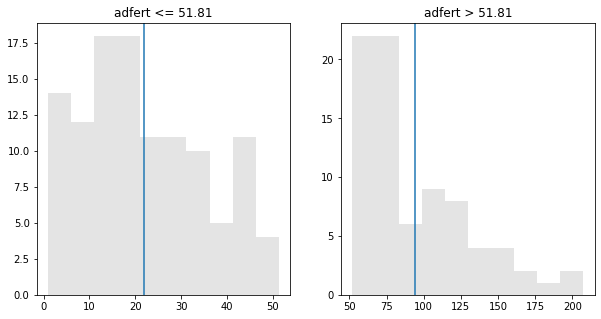

In [31]:
#NOTA:
#SE CORRIGIO EL VALOR DE LA MEDIA QUE MOSTRABA COMO TITULO EL GRAFICO, YA QUE EL CODIGO MOSTRABA LA MEDIA DEL PRIMER HISTOGRAMA (hist_0, que son los valores por debajo de la media global),
#QUE CORRESPONDIA A 21,88 PERO ESTO NO DEBE SER ASÍ YA QUE EL TITULO DEE HACER REFERENCIA A LA MEDIA GLOBAL QUE ES POR LA QUE SE DIVIDIO EN 2 EL DATASET, POR ENDE,
#EL VALOR EL CUAL DEBE MOSTRAR COMO TITULO ES 51.81

def binarize_histogram(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()

    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 2)))
    
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} > {1}".format(variable, round(np.mean(tmp[variable]), 2)))

binarize_histogram(df, 'adfert')

In [38]:
# Utiliza esta celda para definir tu funcion refactorizada.
def binarize_histogram_sns(dataframe, var):
    """
        Objetivo:
            - Generar 2 histogramas a partir de una variable, tomando como division la media de la variable.            
        Parámetros:
            - dataframe (dataframe): Dataframe donde se encuentra la variable cuantitativa
            - var (serie): variable cuantitativa a la cual se le aplicará el histograma

        Retorno:
           - Grafico (2 histogramas)
    """

    df_tmp = dataframe.copy()
    media_global = df_tmp[var].mean()

    bin_col = f'binarize_{var}'
    df_tmp[bin_col] = np.where(df_tmp[var] > media_global, 1, 0)

    g = sns.FacetGrid(df_tmp, col = bin_col, sharex = False)
    g.map(sns.histplot, var)

    line_position = df_tmp.groupby(bin_col)[var].mean()

    for i, ax in enumerate(g.axes.flat):
        ax.axvline(line_position[i])
        ax.set_title(f'{var} {"<" if i==0 else ">="} {media_global:.2f}')


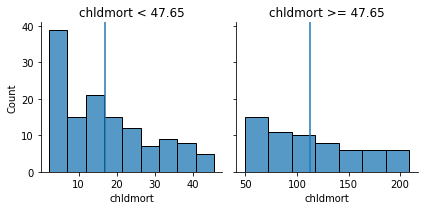

<Figure size 1440x720 with 0 Axes>

In [37]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 1
binarize_histogram_sns(df, 'chldmort')

**Comentarios**
 
**A simple vista, se ve que hay mas valores por debajo de la media que por sobre la media, ya que hay muchos valores que estan entre 0-10; y para los valores por sobre la media, tienden a tener mas o menos frecuencias similares**

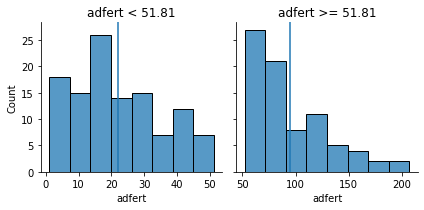

In [21]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 2
binarize_histogram_sns(df, 'adfert')

**Comentarios**

**Claramentes, hay muchos valores de valores pequeños ya que la media esta cercana a 50 y hay datos que rondean los 200, siendo estos muy extremos**

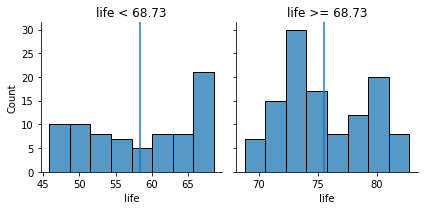

In [22]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 3
binarize_histogram_sns(df, 'life')

**Comentarios**

**Por lo mostrado, se ve que hay muchos valores altos, es por esto que la media esta mas cerca de los valores altos**

### Boxplots

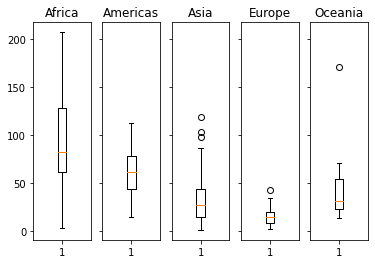

In [24]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')

In [25]:
# Utiliza esta celda para definir tu funcion refactorizada.

def binarize_boxplot_sns(dataframe, var, group_by):
    """
        Objetivo:
            - Generar un boxplot para una determinada variable, la cual, será segmentada segun una cierta variable categorica para el comportamiento segun cada categoria         
        Parámetros:
            - dataframe (dataframe): Dataframe donde se encuentra la variable cuantitativa
            - var (serie): variable cuantitativa a la cual se le aplicará el boxplot
            - group_by (string): nombre de la variable por la cual se quiere agrupar para obtener los distintos boxplot

        Retorno:
           - grafico (boxplot)
    """
    sns.boxplot(data = dataframe, x=group_by, y = var, color = 'blue')

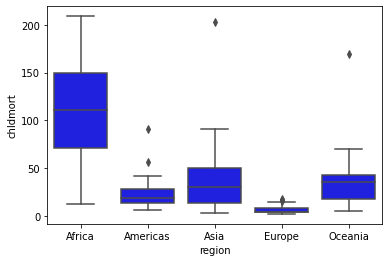

In [26]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 1

binarize_boxplot_sns(df, 'chldmort', 'region')

**Comentarios**

**claramente se aprecia que la distribucion de los valores de la variable chldmort tiene mayor variabilidad para la region de Africa, siendo Europa el que menos variabilidad tiene. Por otro lado, Asia y Oceania son bastante similares. Ademas, tanto Asia como Oceania poseen un valor atipico muy alto**

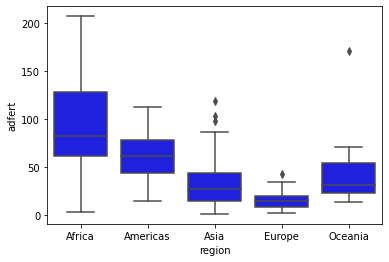

In [27]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 2

binarize_boxplot_sns(df, 'adfert', 'region')

**Comentarios**

**al igual que el anterior, para la variable adfert, la region de africa es la que presenta mayor variabilidad con respecto a las demas regiones, teniendo un promedio mucho mayor a los demas. Europa siguien siendo la que posee menor variabilidad.**

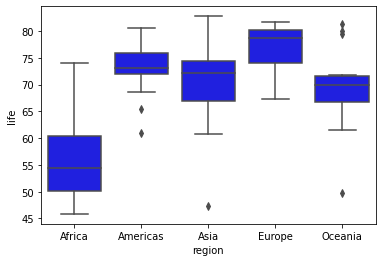

In [29]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 3

binarize_boxplot_sns(df, 'life', 'region')

**Comentarios**

**Para la variable life, si bien africa sigue siendo la que posee mayor variabilidad, la media esta por debajo de todas las demas regiones, siendo Europa el que posee el promedio más alto de las regiones. Por ultimo, los valores de africa tienden a estar muy por debajo del resto de las regiones**

### Scatterplots

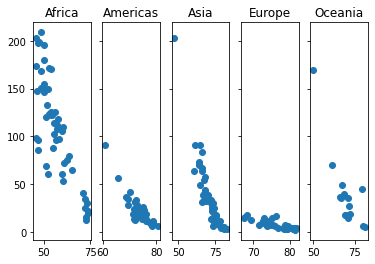

In [30]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()

    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)

    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'life', 'chldmort', 'region')

In [39]:
# Utiliza esta celda para definir tu funcion refactorizada.

def grouped_scatterplot_sns(dataframe, x, y, group_by):
    """
        Objetivo:
            - Generar un scatterplot para dos variables cuantitativas, la cual, será segmentada segun una cierta variable categorica para el comportamiento segun cada categoria         
        Parámetros:
            - dataframe (dataframe): Dataframe donde se encuentra las variables cuantitativas
            - x (serie): variable cuantitativa reflejada en el eje x
            - y (serie): variable cuantitativa reflejada en el eje x
            - group_by (string): nombre de la variable por la cual se quiere agrupar para obtener los distintos scatterplot

        Retorno:
           - grafico (boxplot)
    """
    
    g = sns.FacetGrid(dataframe, col = group_by)
    g.map(sns.scatterplot, x, y)
    

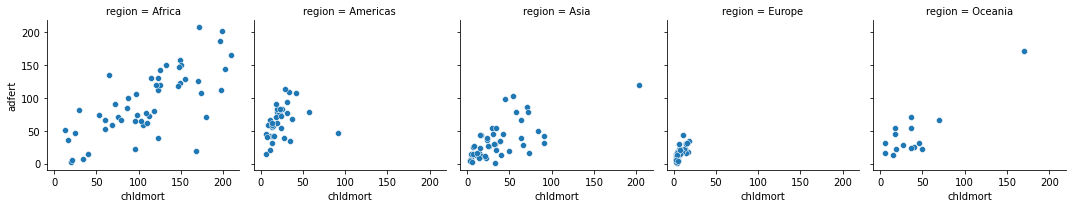

In [40]:
# Utiliza esta celda para graficar los scatterplots solicitados

grouped_scatterplot_sns(df, 'chldmort', 'adfert', 'region')    

**Comentarios**

**Claramente, se ve una relacion positiva para las regiones de Africa. Americas, Asia y Oceania. Para Europa no es tan pbservable este compotamiento ya que los valores tan muy concentrados en los valores pequeño de cada variable**

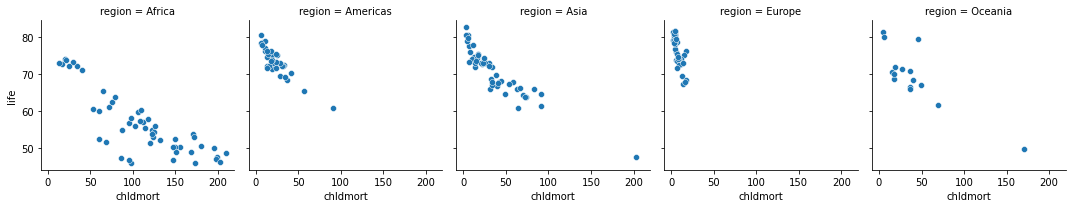

In [44]:
# Utiliza esta celda para graficar los scatterplots solicitados utilizando seaborn para region y tu variable 2

grouped_scatterplot_sns(df, 'chldmort', 'life', 'region')    

**Comentarios**

**Claramente, se ve una relacion negativa para las regiones de Africa, Americas, Asia, Europe y Oceania (para las variables chldmort y life), algunas mas intensas que otras en terminos de pendiente**

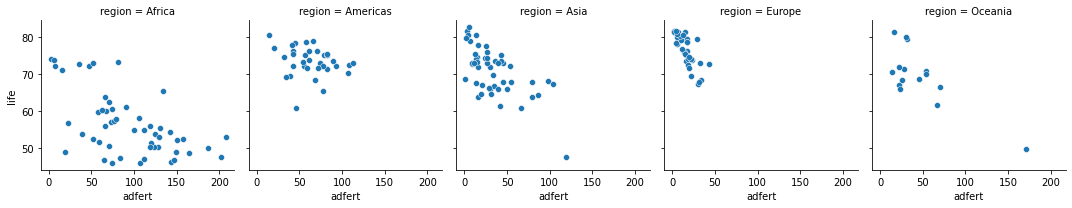

In [42]:
# Utiliza esta celda para graficar los scatterplots solicitados utilizando seaborn para region y tu variable 3

grouped_scatterplot_sns(df, 'adfert', 'life', 'region')    

**Comentarios**

**Solo Asia y Europa se ven que tienen una relacion negativa (o inversa), ya que las otras regiones estan mas dispersas por el plano, siedo dificil poder detectar algun tipo de relacion**

### 3. Generar un heatmap entre todas las variables (2 puntos):
Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

<AxesSubplot:>

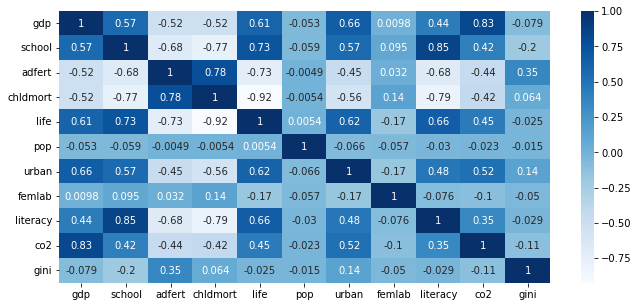

In [45]:
# Usa esta celda para generar df de correlaciones solicitado con todas las variables.

plt.figure(figsize=(11,5))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

<AxesSubplot:>

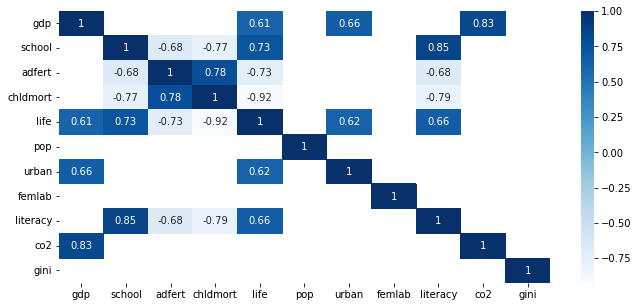

In [46]:
# Usa esta celda para generar heatmap solicitado, con valores > 0.6 (usar valor absoluto).

plt.figure(figsize=(11,5))
sns.heatmap(df.corr()[abs(df.corr())>.6], annot=True, cmap = 'Blues')

**Comentarios**

**Las variables que presentan mayor correlacion positiva (directa) son:**
 * **co2 y gdp con un 0.83**
 * **literacy y school con un 0.85**

**Mientras que las variables que presentan una mayor correlacion inversa (negativa) son:**
 * **life y chldmort con un -0.92**
 * **school y chldmort con un -0.77**

###  4. A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):
- Comente brevemente las principales correlaciones a través de las regiones.

In [49]:
# Usa esta celda para generar df con las variables con principales correlaciones, de ser necesario

df_corr= df[['life','gdp', 'co2', 'school','literacy', 'adfert', 'chldmort', 'region']]

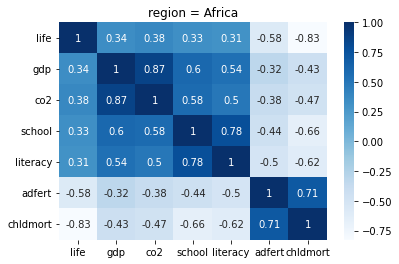

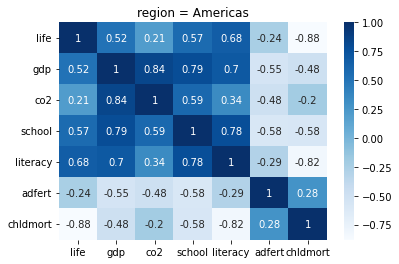

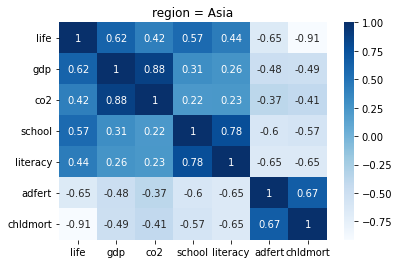

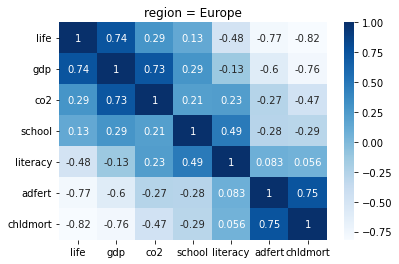

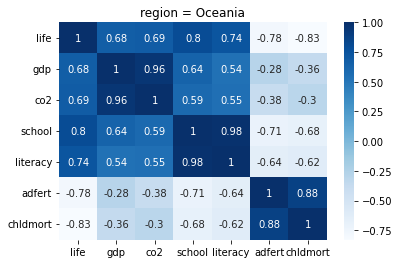

In [50]:
# Usa esta celda para generar la matriz de correlaciones para cada región (Puedes definir una funcion para hacerlo)

def heatmap(dataframe, group_by):
    """
        Objetivo:
            - Generar una serie de graficos de correlacion de variables por cada categoria existente de una variable dada         
        Parámetros:
            - dataframe (dataframe): Dataframe donde se encuentra las variables cuantitativas y la variable categorica
            - group_by (serie): nombre de la variable categorica por la cual se desean generar los multiples gráficos

        Retorno:
           - Multiples graficos de correlacion (heatmap)
    """

    df_tmp = dataframe.copy()

    for i in df_tmp[group_by].unique():
        plt.figure()
        plt.title(f'{group_by} = {i}')
        sns.heatmap(df_tmp[df_tmp[group_by]==i].corr(), annot=True, cmap='Blues')


heatmap(df_corr, 'region')

**Comentarios**

* Para la region de Africa, las variables con mayor correlacion son `co2` y `gdp` con una correlacion igual a `0.87`
* Tanto para las regiones de America, Asia y Europa, las variables con mayor correlacion son `chldmort` y `life` con una correlacion igual a `-0.88`, `-0.91` y `-0.82` respectivamente
* Para la region de Oceania, las variables con mayor correlacion son `literacy` y `school` con una correlacion igual a `0.98`